In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score as nmi_score
from mvlearn.cluster.mv_coreg_spectral import MultiviewCoRegSpectralClustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
RANDOM_SEED=10

In [2]:
# Import the data and matlab results
X1 = np.loadtxt('../Coreg_Validation/X1.csv', delimiter=',')
X2 = np.loadtxt('../Coreg_Validation/X2.csv', delimiter=',')
X3 = np.loadtxt('../Coreg_Validation/X3.csv', delimiter=',')
labels = np.loadtxt('../Coreg_Validation/labels.csv', delimiter=',')
matlab_clusters = np.loadtxt('../Coreg_Validation/matlab_clusters.csv', delimiter=',')
matlab_obj = np.loadtxt('../Coreg_Validation/objective.csv', delimiter=',')

In [3]:
data = [X1, X2, X3]
matlab_clusters = 1 - matlab_clusters

In [4]:
matlab_nmi = np.loadtxt('../Coreg_Validation/matlab_nmi.csv', delimiter=',')
matlab_embed = np.loadtxt('../Coreg_Validation/matlab_embed.csv', delimiter=',')

In [5]:
# Running spectral clustering
lam = 0.5
max_iter = 6
spectral = MultiviewCoRegSpectralClustering(n_clusters=2, 
                    n_views=3, v_lambda=lam, max_iter=max_iter, n_init=1)
predictions = spectral.fit_predict(data)
embedding = spectral._embedding

[[-0.98705068 -0.1604087 ]
 [-0.5949766   0.80374303]
 [-0.58015013  0.81450957]
 [-0.61950722  0.78499096]
 [-0.92299166  0.38481996]
 [-0.47701627 -0.87889447]]
[[ 0.03349329 -0.02260726]
 [ 0.03010516  0.04064591]
 [ 0.02924627  0.03801132]
 ...
 [ 0.02208021  0.03820189]
 [ 0.03297485 -0.02675943]
 [ 0.03031213  0.04008273]]
[[ 0.03346811 -0.02571474]
 [ 0.03013397  0.03977207]
 [ 0.02930873  0.03736807]
 ...
 [ 0.02245538  0.03728046]
 [ 0.03312253 -0.02667088]
 [ 0.03033422  0.03922462]]
[[ 0.03350985 -0.02786398]
 [ 0.03016103  0.0392988 ]
 [ 0.02935855  0.03693059]
 ...
 [ 0.02257436  0.03698774]
 [ 0.03315428 -0.02607993]
 [ 0.030362    0.03874742]]
[[ 0.03354714 -0.02896616]
 [ 0.0301771   0.03902812]
 [ 0.02937884  0.03668792]
 ...
 [ 0.02261309  0.03678507]
 [ 0.03315475 -0.02580465]
 [ 0.03037806  0.03847628]]
[[ 0.03357109 -0.0295584 ]
 [ 0.03018637  0.03887883]
 [ 0.02938886  0.03655327]
 ...
 [ 0.02262748  0.03666957]
 [ 0.03315018 -0.02565012]
 [ 0.03038732  0.03832688

In [6]:
n_trials = 50
nmi_vals = list()
for _ in range(n_trials):
    kmeans = KMeans(n_clusters=2, n_init=1)
    preds = kmeans.fit_predict(embedding)
    nmi_vals.append(nmi_score(preds, labels, average_method='arithmetic'))
nmi_vals = np.array(nmi_vals)

Text(0, 0.5, 'NMI')

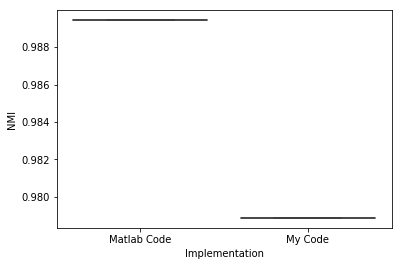

In [7]:
df = pd.DataFrame(np.vstack([matlab_nmi, nmi_vals]).T, columns=['Matlab Code', 'My Code'])
ax = sns.boxplot(data=df)
plt.xlabel('Implementation')
plt.ylabel('NMI')

In [8]:
# Check if all elements of the two spectral embeddings are close enough
print(embedding.shape)
print(matlab_embed.shape)
print(embedding[0])
print(matlab_embed[0])
assert(np.allclose(embedding, matlab_embed))

(1000, 6)
(1000, 6)
[ 0.39155781 -0.34475563  0.295558    0.56932338  0.378094    0.41639804]
[-0.39155781 -0.34475563  0.295558    0.56932338 -0.378094   -0.41639804]


AssertionError: 